In [1]:
import numpy as np
from csc.mmp import *
from csc.utils import *
from csc.atoms import *
from csc.workbench import *
from csc.dictionary import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


### Workbench initialization with a database path

In [2]:
batchSize = 200
path_to_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-signals-{batchSize}.json'
path_to_mmpdf_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mmpdf-{batchSize}.json'
path_to_mp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mp-{batchSize}.json'

workbench = CSCWorkbench(path_to_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

In [3]:
with open(path_to_signals_db, 'r') as f:
            output_data = json.load(f)
            signals_results = output_data['signals']

id0 = next(x['id'] for x in signals_results if x['sparsity'] == 6 and x['snr'] == 10)

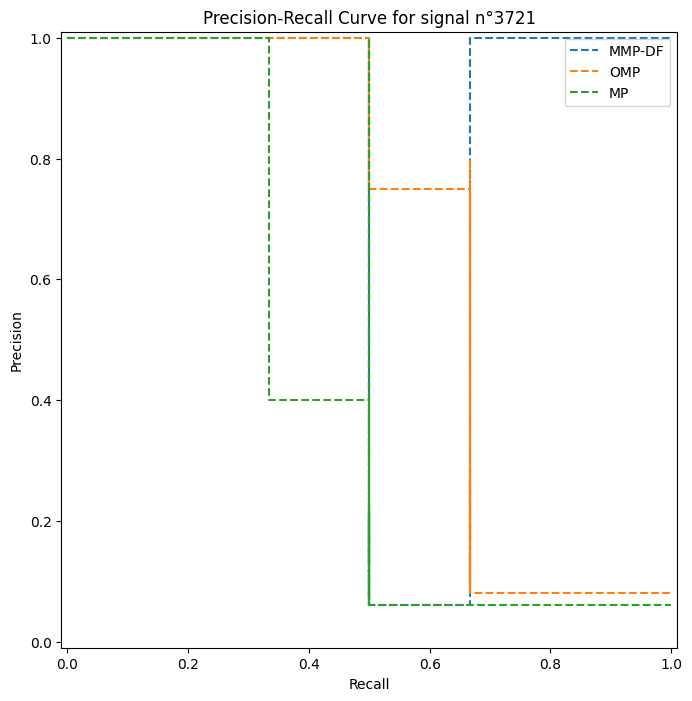

In [9]:
workbench.displayPRCurveComparisonFromId(path_to_mmpdf_db, path_to_mp_db, id0+121, max_branches=10, max_sparsity=50, verbose=False)

### Test OMP vs MMP-DF Candidate

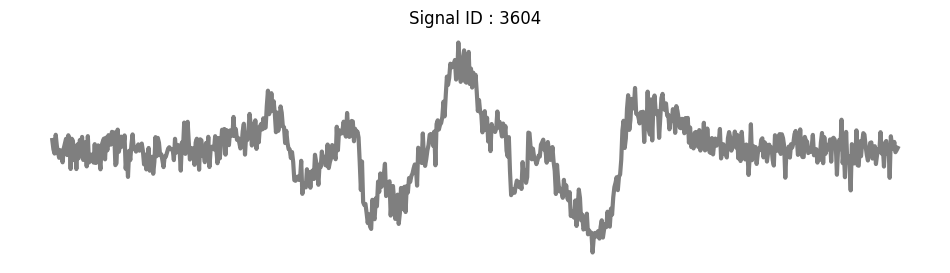

In [5]:
with open(path_to_mmpdf_db, 'r') as f:
    output_data = json.load(f)
    mmpdf_results = output_data['mmp']

signal_id = id0+4
mmp_tree_dict = next(mmpdf_dict['mmp-tree'] for mmpdf_dict in mmpdf_results if mmpdf_dict['id'] == signal_id)
signal_dict = next(x for x in signals_results if x['id'] == signal_id)
tree_sparsity, tree_connections = MMPTree.getTreeParamsFromMMPTreeDict(mmp_tree_dict=mmp_tree_dict)

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(signal_dict['signal'], color='k', lw=3, alpha=0.5)
plt.title(f'Signal ID : {signal_id}')
plt.axis('off')
plt.show()

In [12]:

sub_tree_dict = MMPTree.getSubTreeFromMMPTreeDict(mmp_tree_dict, dictionary, signal_dict['signal'], 6)

check_list_atoms = []
check_list_mse = []
for ((sub_tree_key, sub_tree_value), (tree_key, tree_value)) in zip(sub_tree_dict.items(), mmp_tree_dict.items()):
    # PATH
    print(f'\n\nSub tree path : {sub_tree_key} ; Tree path : {tree_key}')
    
    # Sub tree atoms & MSE
    print(f'   SubTree atoms MSE =  {sub_tree_value["mse"]}')
    for atom in sub_tree_value['atoms']:
        print(f'      {atom}')

    # Tree atoms & MSE
    print(f'   Tree atoms MSE =  {tree_value["mse"]}')
    for atom in tree_value['atoms']:
        print(f'      {atom}')

    # Check
    check_list_atoms.append(sub_tree_value['atoms'] == tree_value['atoms'])
    check_list_mse.append(np.isclose(sub_tree_value['mse'], tree_value['mse']))

print(all(check_list_atoms))
print(all(check_list_mse))



Sub tree path : 1-1-1-1-1-1 ; Tree path : 1-1-1-1-1-1
   SubTree atoms MSE =  0.0013075732695544805
      {'x': 195, 'b': 0.055, 'y': 0.03, 's': 6.2248555025221e-05}
      {'x': 21, 'b': 0.055, 'y': 0.034, 's': 7.393805589498585e-05}
      {'x': 58, 'b': 0.034999999999999996, 'y': 0.016, 's': 2.4700769240040715e-05}
      {'x': 222, 'b': 0.025, 'y': 0.032, 's': 6.596752580999086e-05}
      {'x': 11, 'b': 0.055, 'y': 0.012, 's': 1.653959710339202e-05}
      {'x': 131, 'b': 0.005, 'y': 0.01, 's': 1.3516616682807639e-05}
   Tree atoms MSE =  0.0013075732695544805
      {'x': 195, 'b': 0.055, 'y': 0.03, 's': 6.2248555025221e-05}
      {'x': 21, 'b': 0.055, 'y': 0.034, 's': 7.393805589498585e-05}
      {'x': 58, 'b': 0.034999999999999996, 'y': 0.016, 's': 2.4700769240040715e-05}
      {'x': 222, 'b': 0.025, 'y': 0.032, 's': 6.596752580999086e-05}
      {'x': 11, 'b': 0.055, 'y': 0.012, 's': 1.653959710339202e-05}
      {'x': 131, 'b': 0.005, 'y': 0.01, 's': 1.3516616682807639e-05}


Sub t

Signal ID : 3604
OMP atoms :
    {'x': 195, 'b': 0.055, 'y': 0.03, 's': 6.2248555025221e-05}
    {'x': 21, 'b': 0.055, 'y': 0.034, 's': 7.393805589498585e-05}
    {'x': 58, 'b': 0.034999999999999996, 'y': 0.016, 's': 2.4700769240040715e-05}
    {'x': 222, 'b': 0.025, 'y': 0.032, 's': 6.596752580999086e-05}
    {'x': 11, 'b': 0.055, 'y': 0.012, 's': 1.653959710339202e-05}
    {'x': 131, 'b': 0.005, 'y': 0.01, 's': 1.3516616682807639e-05}
MMP-DF 2-3-1-1-1-1 atoms :
    {'x': 205, 'b': 0.045, 'y': 0.034, 's': 7.209068871352413e-05}
    {'x': 58, 'b': 0.034999999999999996, 'y': 0.016, 's': 2.4700769240040715e-05}
    {'x': 15, 'b': 0.055, 'y': 0.024, 's': 4.556146388937286e-05}
    {'x': 146, 'b': 0.02, 'y': 0.014, 's': 1.9224997624588253e-05}
    {'x': 224, 'b': 0.02, 'y': 0.022, 's': 3.693602068568517e-05}
    {'x': 236, 'b': 0.045, 'y': 0.012, 's': 1.648862170323877e-05}
OMP MSE = 0.0013075732695544805
MMP 2-3-1-1-1-1 MSE = 0.001177568322240264


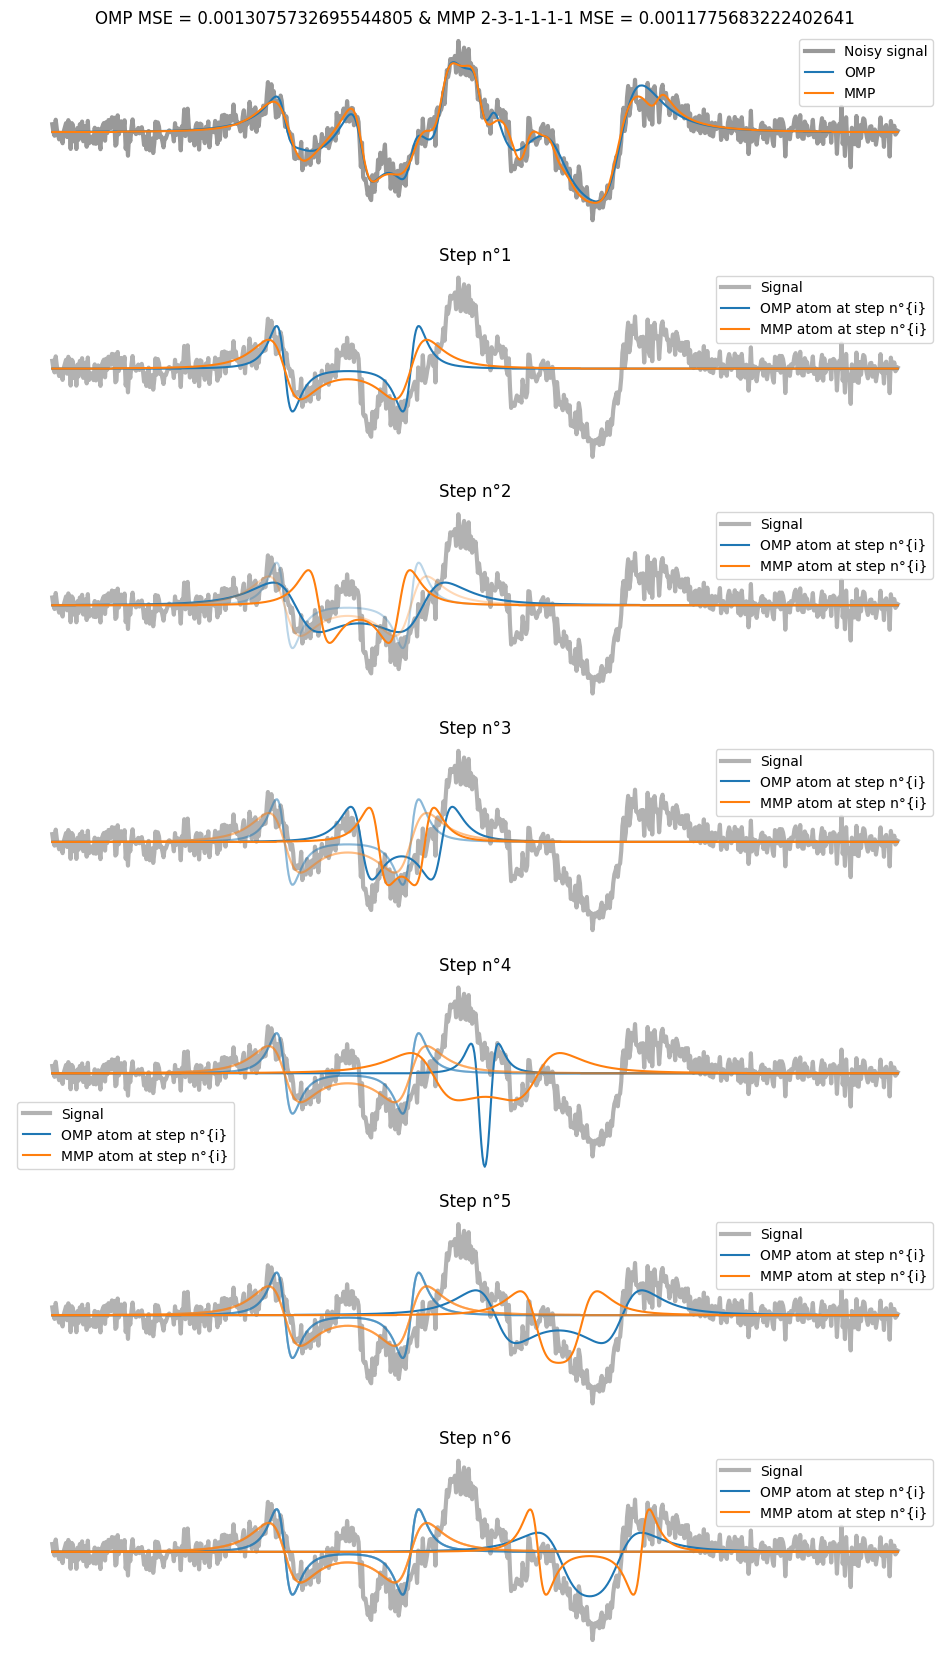

In [7]:
print(f'Signal ID : {signal_id}')
workbench.plotMMPDecomposition(path_to_mmpdf_db, id=signal_id, verbose=True)